In [ ]:
# check which NVIDIA GPU is available
# !nvidia-smi

In [ ]:
# import necessary module
from tensorflow import keras
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Copying the dataset into colab local directory.
!unzip -uq "/content/drive/MyDrive/Colab Notebooks/Dataset/face-mask-dataset2.zip" -d "/content"

In [ ]:
# Initializing the CNN classifier/model
classifier = Sequential([
    # Convolution Layer
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # Pooling
    MaxPooling2D(pool_size=(2,2)),

    # Convolution Layer
    Conv2D(100, (3,3), activation='relu'),
    # Pooling
    MaxPooling2D(pool_size=(2,2)),
    
    # Flattening
    Flatten(),
    # Dropouting
    Dropout(0.5),
    # Fully Connected Dense Layers
    Dense(units=50, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
# classifier.summary()

In [ ]:
# Compiling the CNN model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Image Data Generation/Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Getting the data from content folder
TRAINING_DIR = "/content/face-mask-dataset/train"
VALIDATION_DIR = "/content/face-mask-dataset/test"

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [ ]:
import h5py

# Model checkpoint
mc = ModelCheckpoint('./model/face_mask_detector_model.h5', monitor='val_loss', mode='min', verbose=1, patience=100, save_best_only=True)

In [ ]:
# Fitting/Training the CNN on the Data
history = classifier.fit(train_generator,
                    steps_per_epoch=10,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=10,
                    callbacks=mc)

Epoch 1/20
10/10 [==============================] - 1s 132ms/step - loss: 0.2192 - accuracy: 0.9300 - val_loss: 0.1338 - val_accuracy: 0.9400

Epoch 00001: val_loss did not improve from 0.13058
Epoch 2/20
10/10 [==============================] - 1s 126ms/step - loss: 0.3059 - accuracy: 0.9000 - val_loss: 0.2357 - val_accuracy: 0.9000

Epoch 00002: val_loss did not improve from 0.13058
Epoch 3/20
10/10 [==============================] - 1s 132ms/step - loss: 0.1635 - accuracy: 0.9500 - val_loss: 0.1275 - val_accuracy: 0.9300

Epoch 00003: val_loss improved from 0.13058 to 0.12749, saving model to ./model/face_mask_detector_model.h5
Epoch 4/20
10/10 [==============================] - 1s 137ms/step - loss: 0.3057 - accuracy: 0.8900 - val_loss: 0.2319 - val_accuracy: 0.9100

Epoch 00004: val_loss did not improve from 0.12749
Epoch 5/20
10/10 [==============================] - 1s 131ms/step - loss: 0.1629 - accuracy: 0.9400 - val_loss: 0.1513 - val_accuracy: 0.9700

Epoch 00005: val_loss di

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


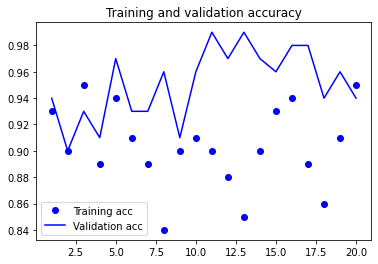

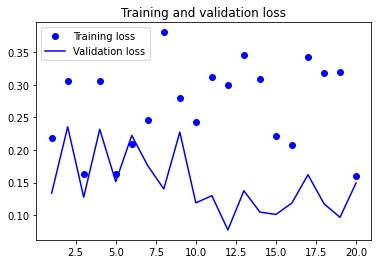

In [ ]:
# plot graph 
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

# Training & validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
# Training & validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()